# Quantum Coin Game

This notebook demonstrates the Quantum Coin Game from Chapter 5, Single-Qubit Quantum Gates.

## 0. Setup

The cells below install the packages and import the libraries needed by this demo.

In [ ]:
#@title Install Qiskit and other dependencies
%pip install qiskit qiskit-aer qiskit-ibm-runtime pylatexenc

In [1]:
# Imports

from math import cos, sin, pi as π
from IPython.display import display, Markdown
from qiskit_aer import AerSimulator
from qiskit.circuit import ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit.quantum_info import partial_trace, Statevector

## 1. Alice Always Wins

Below is the first example, where Alice employs the Hadamard gate, and wins whether Bob uses the $X$ gate or the $I$ (identity) gate (i.e. does nothing).

In [ ]:
def make_circuit1(bob_x = False):
    q = [q0] = QuantumRegister(1, 'q')
    circuit = QuantumCircuit(q)
    circuit.h(q0)       # Alice
    if bob_x:
        circuit.x(q0)   # Bob: X
    else:
        circuit.id(q0)  # Bob: I
    circuit.h(q0)       # Alice
    return circuit


display(Markdown('## Circuit for Bob chooses $X$'))
circuit_bob_x = make_circuit1(bob_x=True)
display(circuit_bob_x.draw('mpl'))
sv_x = Statevector.from_instruction(circuit_bob_x)
display(Markdown(f"Result: ${sv_x.draw('latex_source')}$"))

display(Markdown('## Circuit for Bob chooses $I$'))
circuit_bob_i = make_circuit1(bob_x=False)
display(circuit_bob_i.draw('mpl'))
sv_i = Statevector.from_instruction(circuit_bob_i)
display(Markdown(f"Result: ${sv_i.draw('latex_source')}$"))



## 2. Bob's Strategy Shift

Below is the second example, where Bob switches to the $Y$ gate.

## Circuit for Bob chooses $Y$

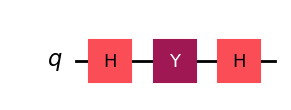

Result: $- i |1\rangle$

In [15]:
def make_circuit2():
    q = [q0] = QuantumRegister(1, 'q')
    circuit = QuantumCircuit(q)
    circuit.h(q0)       # Alice
    circuit.y(q0)       # Bob: Y
    circuit.h(q0)       # Alice
    return circuit


display(Markdown('## Circuit for Bob chooses $Y$'))
circuit_bob_y = make_circuit2()
display(circuit_bob_y.draw('mpl'))
sv_y = Statevector.from_instruction(circuit_bob_y)
display(Markdown(f"Result: ${sv_y.draw('latex_source')}$"))

## 3. Alice Overcomes Bob's New Gambit

Below is one way which Alice can win, when Bob uses the $Y$ gate.

As stated in the book:
$$
X H Y H |0\rangle = i|0\rangle
$$

Therefore Alice uses the gate sequence $H$, $X$ after Bob's $Y$ gate.

## Circuit for Alice applies $X$ after $H$

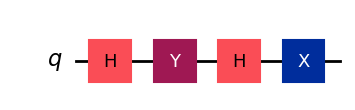

Result: $- i |0\rangle$

In [16]:
def make_circuit3():
    q = [q0] = QuantumRegister(1, 'q')
    circuit = QuantumCircuit(q)
    circuit.h(q0)       # Alice
    circuit.y(q0)       # Bob: Y
    circuit.h(q0)       # Alice
    circuit.x(q0)       # Alice
    return circuit


display(Markdown('## Circuit for Alice applies $X$ after $H$'))
circuit_alice_hx_sequence = make_circuit3()
display(circuit_alice_hx_sequence.draw('mpl'))
sv_alice_hx_sequence = Statevector.from_instruction(circuit_alice_hx_sequence)
display(Markdown(f"Result: ${sv_alice_hx_sequence.draw('latex_source')}$"))
